In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from astropy.cosmology import Planck18,FlatLambdaCDM
import astropy.units as u
from scipy.optimize import curve_fit
import astropy as ap

# print(ap.__version__)

In [ ]:
#@title Definiciones generales
Gyrpc = 0.30659916623719
zbao = np.logspace(-2,1,1000)

#modelos LCDM
P = Planck18
L = FlatLambdaCDM(H0=74,Om0=0.315)

#fit de t0 --> a partir del diagrama de Hubble
t0 = 13.93e9

#escala de las BAO: rdF -> finite universe, rd0 -> Planck18
rdF = 125
rd0 = 147.16

In [ ]:
#@title Distancia de luminosidad
#distancia de luminosidad

dlP = P.luminosity_distance(zbao)/u.Mpc
dlL = L.luminosity_distance(zbao)/u.Mpc
dlteorica = lambda z, t : (1+z)*t*Gyrpc*np.sin(np.log(1+z))*1e-6 #esto está en Mpc
dlteorica_beta = lambda z, t, beta: (1+z)*beta*t*Gyrpc*np.sin(np.log(1+z)/beta)*1e-6
dlF1 = dlteorica(zbao,14.9e9)
dlF2 = dlteorica(zbao,t0)

# plt.figure(figsize=(12,8))
# plt.plot(zbao,dlF1,'g',label='Finite Universe ($H_0$~65 km/s/Mpc) ')
# plt.plot(zbao,dlF2,'c',label='Finite Universe ($H_0$~70 km/s/Mpc) ')
# plt.plot(zbao,dlL,'r',label='$\Lambda$CDM ($H_0$=70 km/s/Mpc)')
# plt.plot(zbao,dlP,'b',label='Planck18')
# plt.legend(loc='lower right', frameon=False)
# plt.xlabel('z', fontsize=12)
# plt.ylabel('Luminosity distance (Mpc)', fontsize=12)
# plt.title('Luminosity distance comparison')
# plt.xticks(size=12)
# plt.yticks(size=12)
# plt.legend(fontsize='small')
# plt.grid()
# # plt.xlim(0.5,20)
# # plt.ylim(0,50000)
# # plt.xscale('log')
# plt.show()

In [ ]:
#@title Distancia comóvil
#distancia comóvil
dcP = P.comoving_distance(zbao)/u.Mpc
dcL = L.comoving_distance(zbao)/u.Mpc

dcteorica = lambda z, t : t*Gyrpc*np.log(1+z)*1e-6 #(en Mpc) Esta distancia es la misma para toda la familia R(t) = beta ct
dcF1 = dcteorica(zbao,14.9e9) #en Mpc
dcF2 = dcteorica(zbao,t0)

# plt.figure(figsize=(12,8))
# plt.plot(zbao,dcF1,'g',label='Finite Universe ($H_0$~65 km/s/Mpc) ') #importante: recordar cambiar a Mpc
# plt.plot(zbao,dcF2,'c',label='Finite Universe ($H_0$~70 km/s/Mpc) ')
# plt.plot(zbao,dcL,'r',label='$\Lambda$CDM ($H_0$=70 km/s/Mpc)')
# plt.plot(zbao,dcP,'b',label='Planck18')
# plt.legend(loc='lower right', frameon=False)
# plt.xlabel('zbao', fontsize=12)
# plt.ylabel('Comoving distance (Mpc)', fontsize=12)
# plt.title('Comoving distance comparison')
# plt.xticks(size=12)
# plt.yticks(size=12)
# plt.legend(fontsize='small')
# plt.grid()

# # plt.xscale('log')
# plt.xlim(0,6)
# plt.ylim(0,10000)

# plt.show()

In [ ]:
#@title Datos del GP (fitGP): primera columna redshift, segunda da/rd
fitGP=np.matrix([0.000000000000000000e+00,1.555338375521741590e+00,5.314795371126505019e-01,
2.525252525252525207e-02,1.948579775742763864e+00,4.608509757959585174e-01,
5.050505050505050414e-02,2.339325733546709252e+00,3.955923886571839909e-01,
7.575757575757575968e-02,2.726769499600714131e+00,3.358902007177441140e-01,
1.010101010101010083e-01,3.110123857493149124e+00,2.819940719455223954e-01,
1.262626262626262708e-01,3.488624366673981569e+00,2.342538519051149959e-01,
1.515151515151515194e-01,3.861532474295760409e+00,1.931668655278123148e-01,
1.767676767676767680e-01,4.228138477555702934e+00,1.594121775969932209e-01,
2.020202020202020166e-01,4.587764319122671353e+00,1.337834297289507701e-01,
2.272727272727272652e-01,4.939766199364147958e+00,1.168357398064465841e-01,
2.525252525252525415e-01,5.283536990310081727e+00,1.081855744006131048e-01,
2.777777777777777901e-01,5.618508437666921651e+00,1.060521764513797788e-01,
3.030303030303030387e-01,5.944153138622342958e+00,1.078025736220638853e-01,
3.282828282828282873e-01,6.259986284724038619e+00,1.109994052713204754e-01,
3.535353535353535359e-01,6.565567160748968512e+00,1.139672794296555519e-01,
3.787878787878787845e-01,6.860500392122848901e+00,1.158168659281203078e-01,
4.040404040404040331e-01,7.144436935204243611e+00,1.163063202905048055e-01,
4.292929292929292817e-01,7.417074806486287919e+00,1.157504219793062533e-01,
4.545454545454545303e-01,7.678159548561819925e+00,1.150107226228991864e-01,
4.797979797979797789e-01,7.927484432477808873e+00,1.155076581287155096e-01,
5.050505050505050830e-01,8.164890397881084283e+00,1.191127527321294705e-01,
5.303030303030302761e-01,8.390265734122298369e+00,1.277586126877398032e-01,
5.555555555555555802e-01,8.603545507189201302e+00,1.428464263472086215e-01,
5.808080808080807733e-01,8.804710739027235888e+00,1.648907238653827823e-01,
6.060606060606060774e-01,8.993787347397740106e+00,1.936705594972316646e-01,
6.313131313131312705e-01,9.170844855964618958e+00,2.286207686308187048e-01,
6.565656565656565746e-01,9.335994885742554317e+00,2.691235520462033071e-01,
6.818181818181817677e-01,9.489389440389688346e+00,3.146294138719321065e-01,
7.070707070707070718e-01,9.631218999066282649e+00,3.646778744611543499e-01,
7.323232323232323759e-01,9.761710431710868718e+00,4.188820672402081002e-01,
7.575757575757575690e-01,9.881124752584979021e+00,4.769069896592137980e-01,
7.828282828282828731e-01,9.989754728809321804e+00,5.384509210713160909e-01,
8.080808080808080662e-01,1.008792236136102360e+01,6.032316197922297230e-01,
8.333333333333333703e-01,1.017597625658317462e+01,6.709766058844196523e-01,
8.585858585858585634e-01,1.025428890673896554e+01,7.414164744919947703e-01,
8.838383838383838675e-01,1.032325389843422769e+01,8.142803540877456836e-01,
9.090909090909090606e-01,1.038328306792044486e+01,8.892928689242122209e-01,
9.343434343434343647e-01,1.043480362230527447e+01,9.661721667715418294e-01,
9.595959595959595578e-01,1.047825524559899790e+01,1.044628716896721210e+00,
9.848484848484848619e-01,1.051408720826187526e+01,1.124364680280009132e+00,
1.010101010101010166e+00,1.054275549854655658e+01,1.205073718057481313e+00,
1.035353535353535248e+00,1.056471999341773049e+01,1.286441146053208140e+00,
1.060606060606060552e+00,1.058044168619869119e+01,1.368144370643911811e+00,
1.085858585858585856e+00,1.059037998735610131e+01,1.449853559151776716e+00,
1.111111111111111160e+00,1.059499011398271051e+01,1.531232509788315932e+00,
1.136363636363636465e+00,1.059472058259491689e+01,1.611939694012996416e+00,
1.161616161616161547e+00,1.059001081883084794e+01,1.691629449418795339e+00,
1.186868686868686851e+00,1.058128889652736682e+01,1.769953304820906403e+00,
1.212121212121212155e+00,1.056896941747520557e+01,1.846561421710847917e+00,
1.237373737373737459e+00,1.055345154192798596e+01,1.921104138048804089e+00,
1.262626262626262541e+00,1.053511717866155806e+01,1.993233601782394393e+00,
1.287878787878787845e+00,1.051432934207141656e+01,2.062605482690181624e+00,
1.313131313131313149e+00,1.049143068246526056e+01,2.128880752298579981e+00,
1.338383838383838453e+00,1.046674219436739151e+01,2.191727522816616425e+00,
1.363636363636363535e+00,1.044056210630166248e+01,2.250822937362325415e+00,
1.388888888888888840e+00,1.041316495419151167e+01,2.305855105297620611e+00,
1.414141414141414144e+00,1.038480083919635710e+01,2.356525078320263589e+00,
1.439393939393939448e+00,1.035569486951963825e+01,2.402548865163975478e+00,
1.464646464646464752e+00,1.032604678447900248e+01,2.443659485423674838e+00,
1.489898989898989834e+00,1.029603075792267219e+01,2.479609066261306616e+00,
1.515151515151515138e+00,1.026579537693985777e+01,2.510170989692942278e+00,
1.540404040404040442e+00,1.023546379072177892e+01,2.535142102978091838e+00,
1.565656565656565746e+00,1.020513402341877196e+01,2.554345010533408900e+00,
1.590909090909090828e+00,1.017487944390221877e+01,2.567630473039521188e+00,
1.616161616161616132e+00,1.014474938447155594e+01,2.574879948324830803e+00,
1.641414141414141437e+00,1.011476989977686536e+01,2.576008319595339380e+00,
1.666666666666666741e+00,1.008494465652966099e+01,2.570966870120891645e+00,
1.691919191919191823e+00,1.005525594398192979e+01,2.559746580155175977e+00,
1.717171717171717127e+00,1.002566579462994767e+01,2.542381842294980654e+00,
1.742424242424242431e+00,9.996117204195126504e+00,2.518954716323892118e+00,
1.767676767676767735e+00,9.966535439592220769e+00,2.489599874362034448e+00,
1.792929292929293039e+00,9.936829423373216841e+00,2.454510422003983283e+00,
1.818181818181818121e+00,9.906893182976435952e+00,2.413944820331834329e+00,
1.843434343434343425e+00,9.876607353062102135e+00,2.368235174678309019e+00,
1.868686868686868729e+00,9.845840719236827354e+00,2.317797192787687699e+00,
1.893939393939394034e+00,9.814451791579335449e+00,2.263142135348023665e+00,
1.919191919191919116e+00,9.782290396571909241e+00,2.204891062784274158e+00,
1.944444444444444420e+00,9.749199276293966321e+00,2.143791583127730771e+00,
1.969696969696969724e+00,9.715015684075341440e+00,2.080737059040665304e+00,
1.994949494949495028e+00,9.679572966194465167e+00,2.016787732407246736e+00,
2.020202020202020332e+00,9.642702119664162907e+00,1.953192324079167319e+00,
2.045454545454545414e+00,9.604233316654767094e+00,1.891407189599275007e+00,
2.070707070707070496e+00,9.563997386659634614e+00,1.833107929921238721e+00,
2.095959595959596022e+00,9.521827248104578700e+00,1.780185566961925758e+00,
2.121212121212121104e+00,9.477559281737860886e+00,1.734716653098456352e+00,
2.146464646464646631e+00,9.431034638795681602e+00,1.698895609779053961e+00,
2.171717171717171713e+00,9.382100477629947477e+00,1.674920847025138659e+00,
2.196969696969696795e+00,9.330611123184727518e+00,1.664836473514484494e+00,
2.222222222222222321e+00,9.276429144426941775e+00,1.670348586893955156e+00,
2.247474747474747403e+00,9.219426345557540259e+00,1.692653223745830271e+00,
2.272727272727272929e+00,9.159484667553595472e+00,1.732320663802384475e+00,
2.297979797979798011e+00,9.096496997310650201e+00,1.789268782281355108e+00,
2.323232323232323093e+00,9.030367882363334431e+00,1.862829473811840497e+00,
2.348484848484848619e+00,8.961014149859009237e+00,1.951882352836300738e+00,
2.373737373737373701e+00,8.888365429135086870e+00,2.055014929333021545e+00,
2.398989898989898784e+00,8.812364577904567398e+00,2.170672392714385612e+00,
2.424242424242424310e+00,8.732968012683674175e+00,2.297275259329563113e+00,
2.449494949494949392e+00,8.650145944693525379e+00,2.433298904351464120e+00,
2.474747474747474918e+00,8.563882523032752658e+00,2.577319344240679211e+00,
2.500000000000000000e+00,8.474175887449410638e+00,2.728033859520502258e+00
])
fitGP=fitGP.reshape(100,3)

[142.60829234   5.02726576]
Distancia r_d predicha por el fit: 139.45417806258743  +/-  1.7228652845589005


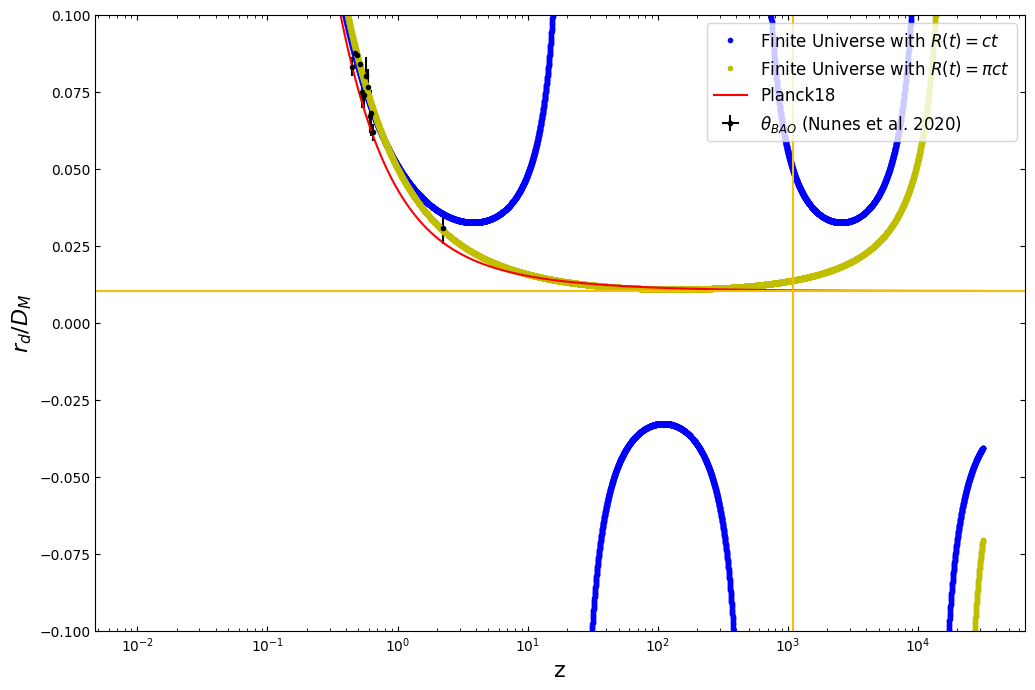

In [ ]:
#@title Transverse BAO, $\theta_{BAO}$

import warnings
warnings.filterwarnings("ignore")
zCMB=np.logspace(-2,4.5,10000)
#distancia de diámetro angular LCDM/Planck18
daP = P.angular_diameter_distance(zCMB)/u.Mpc
daL = L.angular_diameter_distance(zCMB)/u.Mpc

#distancia de diámetro angular Finite Universe
dateorica = lambda z, t : 1/(1+z)*t*Gyrpc*np.sin(np.log(1+z))*1e-6 #Mpc´
dateorica_beta = lambda z, t, beta: 1/(1+z)*beta*t0*Gyrpc*np.sin(np.log(1+z)/beta)*1e-6

dateorica_rd = lambda z, rd : 1/(1+z)*t0*Gyrpc*np.sin(np.log(1+z))*1e-6/rd #Mpc (aquí ya dividiendo entre rd, la utilizaremos para el fit de rd)
dateorica_rd_beta = lambda z, rd, beta : 1/(1+z)*beta*t0*Gyrpc*np.sin(np.log(1+z)/beta)*1e-6/rd

daF = dateorica(zCMB, t0)
daF_beta = dateorica_beta(zCMB, t0, np.pi)
#------------------------------------------------

#fit Gaussian Process
zda_GP = np.array(fitGP[:,0])
da_GP = np.array(fitGP[:,1])

#------------------------------------------------
thetaBAO=np.array([0.11,19.8,3.26,
0.235,9.06,0.23,
0.365,6.33,0.22,
0.45,4.77,0.17,
0.47,5.02,0.25,
0.49,4.99,0.21,
0.51,4.81,0.17,
0.53,4.29,0.30,
0.55,4.25,0.25,
0.57,4.59,0.36,
0.59,4.39,0.33,
0.61,3.85,0.31,
0.63,3.90,0.43,
0.65,3.55,0.16,
2.225,1.77,0.31])
thetaBAO=thetaBAO.reshape(15,3)
#------------------------------------------------

errztheta = np.array([0.005,0.035,0.025,0.01,0.005,0.01,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.01,0.025])
ztheta = thetaBAO[:,0]
angle = thetaBAO[:,1]*np.pi/180 #cambiamos los ángulos a radianes
DMtheta = 1/(angle) #el inverso del ángulo es DM
errangle = thetaBAO[:,2]*np.pi/180

datheta = DMtheta/(1+ztheta)
errDMtheta = DMtheta**2*(errangle)
errdatheta = errDMtheta/(1+ztheta)

#cálculo del rd óptimo con \theta_BAO
popt, pcov = curve_fit(dateorica_rd, ztheta, datheta, sigma=errdatheta, absolute_sigma=True)
popt_beta, pcov_beta = curve_fit(dateorica_rd_beta, ztheta, datheta, sigma=errdatheta, absolute_sigma=True)
print(popt_beta)
print('Distancia r_d predicha por el fit:', popt[0], ' +/- ',np.float(pcov[0]**(1/2)))
# print('Distancia r_d predicha por el fit con R(t) = beta ct:', popt_beta[0], ' +/- ', np.float(pcov_beta[0]**(1/2)))
# print('Edad actual del universo con R(t) = beta ct:', popt_beta[1], ' +/- ', np.float(pcov_beta[1]**(1/2)))
# print('Valor de beta con R(t) = beta ct:', popt_beta[2], ' +/- ', np.float(pcov_beta[2]**(1/2)))

rdF=popt[0] #redefinición de rd. Tomamos el rd óptimo para \theta_BAO
# rdF=127.2 #cambios en rd, si existieran
rdF=139.5
#---------------------------------------------------

#3D BAO (no las vamos a considerar, nos quedamos con las BAO 2D)
z_stai=np.array([0.11,0.24,0.32,0.38,0.44,0.51,0.54,0.6,0.697,0.73,0.81,0.85,0.874,1,1.480,2.00,2.35,2.4])
da_stai=np.array([2.607,5.594,6.636,7.389,8.19,7.893,9.212,9.37,10.18,10.42,10.75,10.76,11.41,11.521,12.18,12.011,10.83,10.5])
errda_stai=np.array([0.138,0.305,0.11,0.122,0.77,0.279,0.41,0.65,0.52,0.73,0.43,0.54,0.74,1.032,0.32,0.562,0.54,0.34])

#--------------------------------------------------
plt.figure(figsize=(12,8))
# plt.errorbar(ztheta,angle,yerr=err_angle,fmt='b.')
# plt.plot(zda_GP,da_GP/zda_GP,color='xkcd:golden rod',linestyle='--',label='GP')
plt.errorbar(ztheta,angle,yerr=errangle,xerr=errztheta,fmt='k.',label='$\\theta_{BAO}$ (Nunes et al. 2020)')
# plt.errorbar(z_stai,DA_stai,errDA_stai,fmt='g.',label='Staicova et al. (2022)')

plt.plot(zCMB, rdF/(daF*(1+zCMB)), 'b.', label='Finite Universe with $R(t) = ct$') #importante: recordar que daF está en Mpc, rdF tiene que estarlo también
plt.plot(zCMB, rd0/(daF_beta*(1+zCMB)), 'y.', label='Finite Universe with $R(t) = \pi ct$') #importante: recordar cambiar a Mpc

# plt.plot(zbao,np.arcsin(135/daF2/(1+z))*180/np.pi,'b',label='Finite Universe ($H_0$~70 km/s/Mpc) ')
plt.plot(zCMB, rd0/(daP*(1+zCMB)),'r',label='Planck18')
# plt.axhline(0.010411,color='xkcd:golden rod')
plt.axhline(0.010411,color='xkcd:golden rod')#valor en radianes, tomado de Planck
plt.axvline(1090,color='xkcd:golden rod')

# plt.plot(zbao,np.arcsin(148/daP/(1+z))*180/np.pi,'r',label='Planck18')

plt.legend(loc='upper right', frameon=True, fontsize=12)
plt.tick_params(axis ='both',which='both',direction='in',top='True',right='True')
plt.xlabel('z', fontsize=16)
plt.ylabel('$r_d/D_M$', fontsize=16)


# plt.xlim(1e2,1e5)
plt.ylim(-0.1,0.1)
# plt.ylim(-1,1)
# plt.ylim(0.0104,.01045)

# plt.yscale('log')
plt.xscale('log')
plt.show()
# print('Predicción aprox. de la temperatura del CMB según nuestro modelo: ', 2.75*1e4)

In [ ]:
#@title Cálculo $\chi^2$ de $\theta_{BAO}$
thetabao_teorico= lambda z,rd : rd/(t0*Gyrpc*np.sin(np.log(1+z))*1e-6) #Mpc
xitheta_fin=[]

for i in range(0,len(ztheta)):
  xitheta_fin.append(thetabao_teorico(ztheta[i],rdF)) #ya va dividido entre rdF

xitheta_fin=np.array(xitheta_fin)
xitheta_P=rd0/(P.luminosity_distance(ztheta)/u.Mpc/(1+ztheta))

chisq = lambda res, err: np.sum(np.dot((res/err),(res/err)))
res =[]
res.append(xitheta_P-angle)
res.append(xitheta_fin-angle)

chi=[]
for i in range(0,2):
  chi.append(chisq(res[i],errangle))

df = len(ztheta)
print("chisq(D_V): LCDM =",chi[0],"df =",df)
print("chisq(D_V): finite universe =",chi[1],"df =",df)
print('---------')
print("reduced chisq: LCDM =",chi[0]/(df))
print("reduced chisq: finite universe =",chi[1]/(df))


chisq(D_V): LCDM = 44.73454436875934 df = 15
chisq(D_V): finite universe = 16.25211185307808 df = 15
---------
reduced chisq: LCDM = 2.9823029579172893
reduced chisq: finite universe = 1.0834741235385388


In [ ]:
#@title Hubble distance

#Hubble distance DH(z)=c/H(z)
import astropy.constants as ct
c=3e5 #km/s
PH=P.H(zbao)/u.km*u.s*u.Mpc #Hubble parameter for each model
LH=L.H(zbao)/u.km*u.s*u.Mpc
dHP=(ct.c/P.H(zbao)).to_value(u.Mpc) #Mpc
dHL=c/LH
dHteorica=lambda z,t: 1/(1+z)*t*Gyrpc*1e-6 #en Mpc
dHF1=dHteorica(zbao,14.9e9) #en Mpc
dHF2=dHteorica(zbao,t0)

# plt.figure(figsize=(12,8))
# # plt.plot(zbao,1/dHF1,'g',label='Finite Universe ($H_0$~65 km/s/Mpc) ') #importante: recordar cambiar a Mpc
# plt.plot(zbao,1/dHF2/(1+zbao),'c',label='Finite Universe ($H_0$~70 km/s/Mpc) ')
# # plt.plot(zbao,1/dHL,'r',label='$\Lambda$CDM ($H_0$=70 km/s/Mpc)')
# plt.plot(zbao,1/dHP/(1+zbao),'b',label='Planck18')
# plt.legend(loc='lower right', frameon=False)
# plt.xlabel('z', fontsize=12)
# plt.ylabel('Hubble distance (Mpc)', fontsize=12)
# plt.title('Hubble distance comparison')
# plt.xticks(size=12)
# plt.yticks(size=12)
# plt.legend(fontsize='small')
# plt.grid()
# # plt.xlim(0,5)
# # plt.ylim(500,1820)

# # plt.xscale('log')
# plt.show()

In [ ]:
#@title Distancia comóvil angular
#comoving angular distance
#dl/(1+z)
dMF1=dlF1/(1+zbao) #en Mpc
dMF2=dlF2/(1+zbao)
# plt.figure(figsize=(12,8))
# plt.plot(zbao,dlF1/(1+zbao),'g',label='Finite Universe ($H_0$~65 km/s/Mpc) ') #importante: recordar cambiar a Mpc
# plt.plot(zbao,dlF2/(1+zbao),'c',label='Finite Universe ($H_0$~70 km/s/Mpc) ')
# plt.plot(zbao,dlL/(1+zbao),'r',label='$\Lambda$CDM ($H_0$=70 km/s/Mpc)')
# plt.plot(zbao,dlP/(1+zbao),'b',label='Planck18')
# plt.legend(loc='lower right', frameon=False)
# plt.xlabel('z', fontsize=12)
# plt.ylabel('Comoving angular distance (Mpc)', fontsize=12)
# plt.title('Comoving angular distance comparison')
# plt.xticks(size=12)
# plt.yticks(size=12)
# plt.legend(fontsize='small')
# plt.grid()
# plt.xlim(0,5)
# plt.ylim(0,8000)
# # plt.xscale('log')
# plt.show()

Distancia $r_d$ según el fit:  127.15945645336795 +/- 1.3074127378712654  Mpc


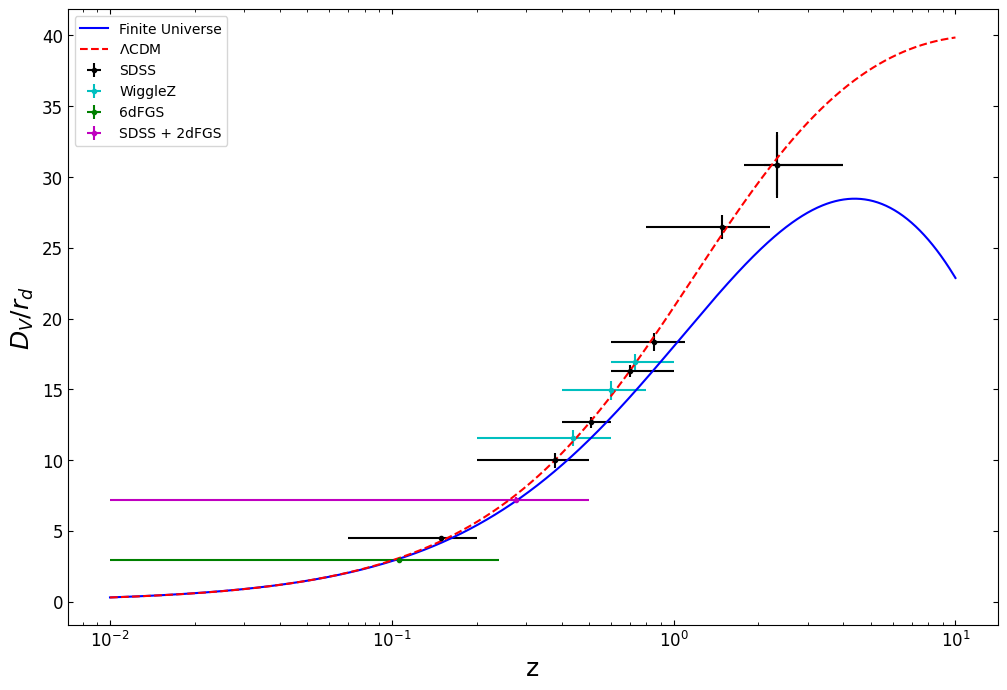

In [ ]:
#@title $D_V/r_d$ (BAO-only)
#distancia mediada esféricamente, DV

#################################################################
# #con BAO-only
DH=np.array([25, 22.33,  19.33,  13.26,  8.93, 9.08 ])
edh=np.array([0.76,0.58,0.53,0.55,0.28,0.34])
DM=np.array([10.23,13.36,17.86,30.69,37.6,37.3])
edm=np.array([0.17,0.21,0.33,0.8,1.9,1.7])
zeff=np.array([0.38, 0.51, 0.70, 1.48, 2.33, 2.33])
#incluyo dos punto más
DVDATA=np.power(zeff*DM**2*DH,1/3)
errDVDATA=1/3*zeff**(1/3)*(2*DM**(-1/3)*DH**(1/3)*edh+DM**(2/3)*DH**(-2/3)*edm)
zeff=zeff.tolist()
zeff.append(0.15)
zeff.append(0.85)
DVDATA=DVDATA.tolist()
DVDATA.append(4.47)
DVDATA.append(18.33)
errDVDATA=errDVDATA.tolist()
errDVDATA.append(0.17)
errDVDATA.append(0.62)
errzeff=np.array([[0.18,0.11,0.1,0.68,0.23,0.56,0.08,0.25],
                  [0.12,0.09,0.3,0.72,1.67,1.67,0.05,0.25]])

#################################################################
# #con datos de BAO+RSD
# DH=np.array([24.89, 22.43,  19.78, 19.6,  13.23,  8.93, 9.08 ])
# edh=np.array([0.58,0.48,0.46,2.1,0.47,0.28,0.34])
# DM=np.array([ 10.27,  13.38,  17.65,  19.5,  30.21,  37.6,  37.3])
# edm=np.array([0.15,0.18,0.30,1.0,0.79,1.9,1.7])
# zeff=np.array([0.38, 0.51, 0.70, 0.85, 1.48, 2.33, 2.33])
# dVDATA=np.power(zeff*DM**2*DH,1/3)
# edVDATA=1/3*zeff**(1/3)*(2*DM**(-1/3)*DH**(1/3)*edh+DM**(2/3)*DH**(-2/3)*edm)
# #incluyo un punto más
# zeff=zeff.tolist()
# zeff.append(0.15)
# dVDATA=dVDATA.tolist()
# dVDATA.append(4.47)
# edVDATA=edVDATA.tolist()
# edVDATA.append(0.17)

# # zeff=np.array([0.38, 0.51, 0.70, 0.85, 1.48, 2.33,2.33])
# errz=np.array([[0.18,0.11,0.1,0.25,0.4,0.23,0.56,0.08],[0.12,0.09,0.3,0.25,0.72,1.67,1.67,0.05]])
# uplims = np.array([0, 0, 0, 0, 0, 1, 1, 0], dtype=bool)
#################################################################

dVP=np.power(zbao*dcP**2*dHP,1/3)
dVL=np.power(zbao*dcL**2*dHL,1/3)
dVF1=np.power(zbao*dMF1**2*dHF1,1/3)
dVF2=np.power(zbao*dMF2**2*dHF2,1/3)

#otros surveys
#DR7
rfid7=153.5 #Mpc, r fiducial del SDSSDR7
z7=np.array([0.275])
DV7=np.array([7.2])
errDV7=DV7**2*np.array([0.0037])
xerrDV7=np.array([[0.265],[0.225]])

#WiggleZ
rfidwig=148.6
zwig=np.array([0.44,0.6,0.73])
DVwig=1/rfidwig*np.array([1716.4,2220.8,2516.1])
errDVwig=1/rfidwig*np.array([83.1,100.6,86.1]) #Kazin et al., Favale et al. 2023
xerrDVwig=[[0.24,0.2,0.13],[0.16,0.2,0.27]]

#6dFGS
z6df=np.array([0.106])
DV6df=np.ones(1)
errDV6df=np.ones(1)
DV6df[0]=(1/0.336)
errDV6df[0]=np.array(1/(0.336**2)*0.015)

#combinamos todos para el fit a D_V
zvfit=np.concatenate((zeff,zwig,z6df,z7))
DVfit=np.concatenate((DVDATA,DVwig,DV6df,DV7))
errDVfit=np.concatenate((errDVDATA,errDVwig,errDV6df,errDV7))

#función que calcula DV para un z y una edad del universo
dv=lambda z,rdF: t0*Gyrpc*np.power((z*1/(1+z)*np.power(np.sin(np.log(1+z)),2)),1/3)*1e-6/rdF #en Mpc

popt,pcov=curve_fit(dv,zvfit,DVfit,sigma=errDVfit,absolute_sigma=True)
print('Distancia $r_d$ según el fit: ',popt[0],'+/-',float(pcov[0]**(1/2)),' Mpc')

plt.figure(figsize=(12,8))
# plt.errorbar([0.15,0.85],[4.47,18.33],yerr=[0.17,0.57],fmt='k.')
# plt.plot(zbao,dVF1,'g',label='Finite Universe ($H_0$~65 km/s/Mpc) ') #importante: recordar cambiar a Mpc
plt.errorbar(zeff,DVDATA,yerr=errDVDATA,xerr=errzeff,fmt='k.',label='SDSS') #,xlolims=uplims

#otros surveys
plt.errorbar(zwig,DVwig,yerr=errDVwig,xerr=xerrDVwig,fmt='c.',label='WiggleZ')
plt.errorbar(z6df,DV6df,yerr=errDV6df,xerr=[[0.096],[0.134]],fmt='g.',label='6dFGS') #Beutleur et al., 6dFGS
plt.errorbar(z7,DV7,yerr=errDV7,xerr=xerrDV7,fmt='m.',label='SDSS + 2dFGS')

plt.plot(zbao,dVF2/rdF,'b',label='Finite Universe')
# plt.plot(zbao,dVL,'r',label='$\Lambda$CDM ($H_0$=70 km/s/Mpc)')
plt.plot(zbao,dVP/rd0,'r--',label='$\Lambda$CDM')
plt.legend(loc='lower right', frameon=False)
plt.xlabel('z', fontsize=18)
plt.ylabel('$D_V$/$r_d$', fontsize=18)
# plt.title('$D_V$ distance comparison')
plt.xticks(size=12)
plt.yticks(size=12)

# plt.errorbar([1.48,0.6],[24,17.2],fmt='g.')

# plt.xlim(0,5)
# plt.ylim(500,1500)
plt.xscale('log')

plt.tick_params(axis ='both',which='both', direction = 'in',top='True',right='True')
plt.savefig('D_V comparison.pdf')

# plt.errorbar([0.106],1/rdF*457,yerr=1/rdF*27,fmt='m.')
# plt.errorbar([0.106],1/rdL*457,yerr=1/rdL*27,fmt='g.')
# zau=[0.106,0.32] #6dFGS, BOSS gal
# DVau=[3.047,8.467]
# errDVau=[0.137,0.167]
# plt.errorbar(zau,DVau,yerr=errDVau,fmt='r.') #Aubourg et al.

# zcart=[0.097,0.122]
# DVcart=1/147.5*np.array([372,539])
# errDVcart=1/147.5*np.array([17,17]) #Carter et al. 2018, primer punto 6dFGS, segundo combinado con MGS
# plt.errorbar(zcart,DVcart,yerr=errDVcart,fmt='m.')

# #datos del SDSS DR7

# DV7=1/rfid7*1104d¡
# errDV7=1/rfid7*30

# #datos del SDSS DR11 (Anderson et al. 2014)
# rfid11=149.28
# z11=np.array([0.32,0.57])
# DV11=1/rfid11*np.array([1264,2056])
# errDV11=1/rfid11*np.array([25,20])
# # xerrDV11=
# #datos del SDSS DR12 (Alam et al. 2016)
# z12=np.array([0.38,0.51,0.61])
# DM12=1/147.78*np.array([1518,1977,2283])
# errDM12=1/147.78*np.array([31,37,44])
# H12=np.array([81.5,90.5,97.3])*u.km/u.s/u.Mpc
# errH12=np.array([2.6,2.7,2.9])*u.km/u.s/u.Mpc
# DH12=1/147.78*(ct.c/H12).to_value(u.Mpc)
# errDH12=1/147.78*(ct.c/(H12**2)*errH12).to_value(u.Mpc)
# DV12=1/147.78*np.array([1477,1877,2140])
# errDV12=1/147.78*np.array([16,19,22])
# plt.errorbar(z12,DV12,yerr=errDV12,fmt='y.',label='SDSS DR12')

# dclcdm6df=P.comoving_distance(0.106).to_value(u.Mpc)
# dhlcdm6df=(ct.c/P.H(0.106)).to_value(u.Mpc)
# dvlcdm6df=np.power((0.106*dclcdm6df**2*dhlcdm6df),1/3)
# #D_V para el 6dFGS
# print(dvlcdm6df)
# print(dv(0.106,125e6)*125e6)
# #ratio de D_V para SDSS DR7
# dclcdm_DR7_35=P.comoving_distance(0.35).to_value(u.Mpc)
# dhlcdm_DR7_35=(ct.c/P.H(0.35)).to_value(u.Mpc)
# dvlcdm_DR7_35=np.power((0.35*dclcdm_DR7_35**2*dhlcdm_DR7_35),1/3)

# dclcdm_DR7_20=P.comoving_distance(0.20).to_value(u.Mpc)
# dhlcdm_DR7_20=(ct.c/P.H(0.20)).to_value(u.Mpc)
# dvlcdm_DR7_20=np.power((0.20*dclcdm_DR7_20**2*dhlcdm_DR7_20),1/3)

# print(dvlcdm_DR7_35/dvlcdm_DR7_20)
# print(dv(0.35,125e6)/dv(0.2,125e6))

plt.legend()
plt.show()

Distancia $r_d$ según el fit (DH):  132.00241881354393 +/- 1.6780878258450964  Mpc
Distancia $r_d$ según el fit (DM):  124.62783110843746 +/- 1.0979621293316943  Mpc


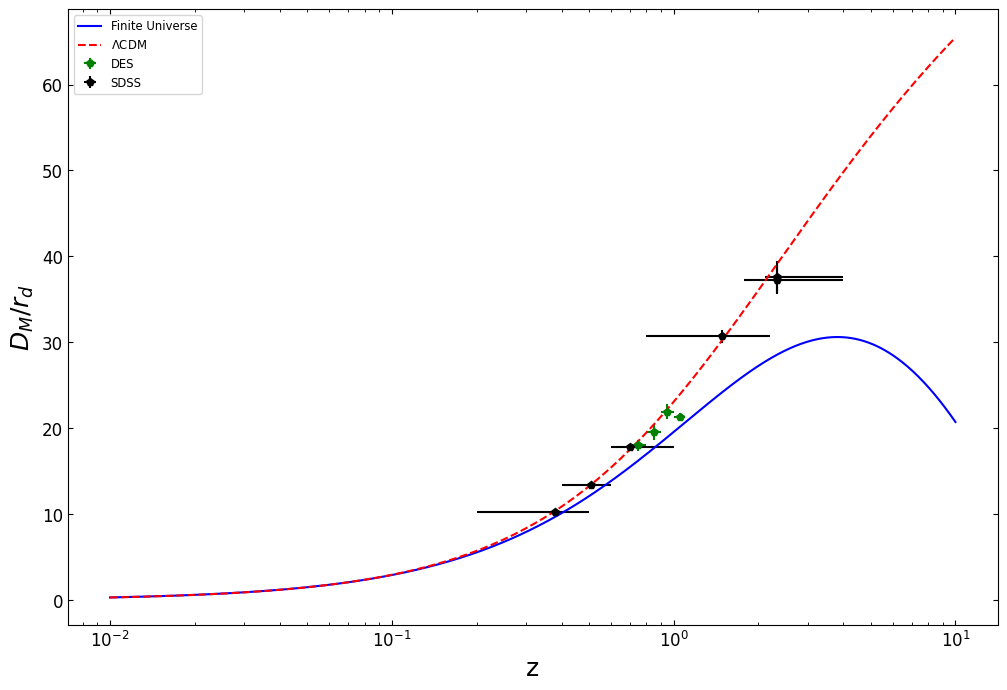

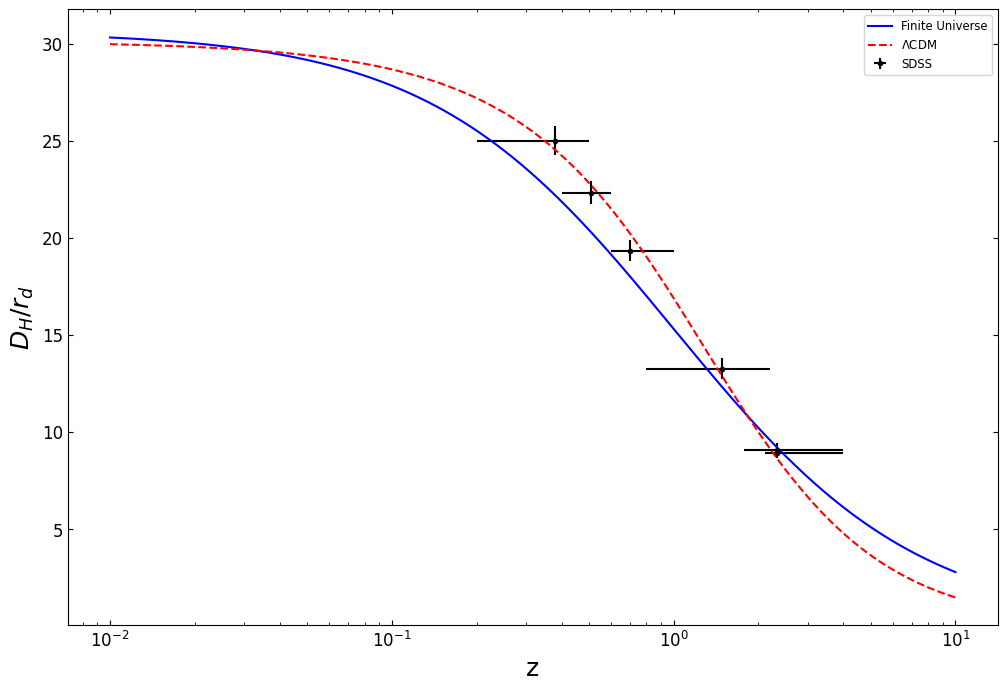

In [ ]:
#@title $D_M/r_d$ y $D_H/r_d$

# con los datos BAO-only
zsdss=np.array([0.38, 0.51, 0.70, 1.48, 2.331,2.332])
errzsdss=np.array([[0.18,0.11,0.1,0.68,0.23,0.56],
                   [0.12,0.09,0.3,0.72,1.67,1.67]])

#incluimos los datos del DES
DESfid=FlatLambdaCDM(H0=67.6,Om0=0.31)
zdes=np.array([0.75,0.85,0.95,1.05])
errzdes=np.array([0.05,0.05,0.05,0.05])
DMfid=DESfid.comoving_distance(zdes)/u.Mpc
rfid=147.6
DMdes=DMfid/rfid*np.array([0.973,0.960,0.987,0.891])   # alpha*DMfid/rdfid
errDMdes=DMfid/rfid*np.array([0.037,0.045,0.039,0.019]) # tomamos primera columna de la tabla II (gaussian)
#######################################################################
# datos que dan mejor chisquare (eliminando los tres ultimos (z<1))
# z=[0.38, 0.51, 0.70, 0.85]
# DM=[ 10.27,  13.38,  17.65,  19.5]
# edm=[0.15,0.18,0.30,1.0]
# DH=[24.89, 22.43,  19.78, 19.6]
# edh=[0.58,0.48,0.46,2.1]

#############################################

# distintas cosmologías (LCDM)
DMP=P.comoving_distance(zbao)/u.Mpc

dhfit = lambda z,rd : t0*Gyrpc/(1+z)/rd*1e-6
dmfit = lambda z,rd : t0*Gyrpc*np.sin(np.log(1+z))/rd*1e-6
# dv=lambda z: t0*Gyrpc*np.power((z*1/(1+z)*np.power(np.sin(np.log(1+z)),2)),1/3)*1e-6
# dmfit=lambda z,rd,ok : t0*0.307*1/np.sqrt(ok)*np.sin(np.sqrt(ok)*np.log(1+z))/rd # ok del fit=0.04 (curvatura)

#ajuste
popt,pcov=curve_fit(dhfit,zsdss,DH,sigma=edh,absolute_sigma=True)
popt2,pcov2=curve_fit(dmfit,zsdss,DM,sigma=edm,absolute_sigma=True)
# popt3,pcov3=curve_fit(f,zf,fsigma,sigma=efsigma,absolute_sigma=True)
print('Distancia $r_d$ según el fit (DH): ',popt[0],'+/-',float(pcov[0]**(1/2)),' Mpc')
print('Distancia $r_d$ según el fit (DM): ',popt2[0],'+/-',float(pcov2[0]**(1/2)),' Mpc')
# print(popt2[1]*1e-9)

#resultado del fit a DV

#construcción datos teóricos (con zl)
dhunivfin=[]
dmunivfin=[]
for i in range(0,len(zbao)):
  dhunivfin.append(dhfit(zbao[i],rdF))
  dmunivfin.append(dmfit(zbao[i],rdF))

# zau=[0.57]
# DMau=[14.945]
# errDMau=[0.210]
# DVau=[20.75]
# errDVau=[0.73] datos de Boss, Aubourg et al. 2015

#Hinton et al. 2017
zwigbao=np.array([0.6,0.73])
DAwig=np.array([10.3,9.8])
errDAwig=np.array([[0.5,0.4],[0.4,1.1]])
DMwig=(1+zwigbao)*DAwig
errDMwig=(1+zwigbao)*errDAwig
DHwig=1/zwigbao*np.array([11.5,15.3])
errDHwig=1/zwigbao*np.array([[1.6,1.8],[1.3,2.1]])
xerrDMwig=[[0.2,0.13],[0.2,0.27]]

#---------------------------------------------
thetaBAO=np.array([0.11,19.8,3.26,
0.235,9.06,0.23,
0.365,6.33,0.22,
0.45,4.77,0.17,
0.47,5.02,0.25,
0.49,4.99,0.21,
0.51,4.81,0.17,
0.53,4.29,0.30,
0.55,4.25,0.25,
0.57,4.59,0.36,
0.59,4.39,0.33,
0.61,3.85,0.31,
0.63,3.90,0.43,
0.65,3.55,0.16,
2.225,1.77,0.31])
thetaBAO=thetaBAO.reshape(15,3)
ztheta=thetaBAO[:,0]
DMtheta=1/(thetaBAO[:,1]*np.pi/180)
errDMtheta=DMtheta**2*(thetaBAO[:,2]*np.pi/180)
#---------------------------------------------------

DHP=(ct.c/P.H(zbao)).to_value(u.Mpc)
plt.figure(figsize=(12,8))
# plt.errorbar(zwig,DMwig,yerr=errDMwig,lw=1.2,markersize=5,fmt='c.',label='WiggleZ')
plt.errorbar(zdes,DMdes,yerr=errDMdes,xerr=errzdes,fmt='p',color='g',label='DES')
plt.errorbar(zsdss,DM,yerr=edm,xerr=errzsdss,fmt='p',color='k',label='SDSS') #,xlolims=lolims
# plt.errorbar(zau,DMau,yerr=errDMau,lw=2,markersize=4,fmt='p',color='c',label='AU data')
# plt.errorbar([2.33,2.33],[DM[5],DM[6]],yerr=[edm[5],edm[6]],xerr=[0.23,0.56],fmt='k.') #errores del Ly-alpha a mano
plt.plot(zbao,dmunivfin,color='b',label='Finite Universe')
plt.plot(zbao,DMP/rd0,'r--',label='$\Lambda$CDM')
plt.legend(loc='lower right', frameon=False)
plt.xlabel('z', fontsize=18)
plt.ylabel('$D_M$/$r_d$', fontsize=18)
# plt.title('BAO transverse measurements')
plt.tick_params(axis ='both',which='both', direction = 'in',top='True',right='True')
plt.legend(fontsize='small')
# plt.grid()
plt.yticks(size=12)
plt.xticks(size=12)
# plt.xlim([0.1,3])
plt.xscale('log')
#plt.errorbar(0.835,18.92,yerr=0.51,fmt='m.',label='DES Y3') #mismo que los datos en verde
plt.savefig('BAO_transverse.pdf')

plt.show()


plt.figure(figsize=(12,8))

#Blake et al. 2012 (combinados con otros datos)
# zwig=np.array([0.05,0.15,0.25,0.35,0.45,0.55,0.65,0.75,0.85])
# Hwig=np.array([70.2,77.4,76.3,81.9,88.4,90.9,103.7,98.2,136.8])*u.km/u.s/u.Mpc
# eHwig=np.array([1.7,2.7,4.7,4.5,5.5,3.4,25.2,6.2,28.5])*u.km/u.s/u.Mpc
# DHwigMpc=(ct.c/Hwig).to_value(u.Mpc)
# errDHwigMpc=(ct.c/Hwig**2*eHwig).to_value(u.Mpc)
# DHwig=DHwigMpc/(rdf*1e-6)
# errDHwig=errDHwigMpc/(rdf*1e-6) #rdf estaba en pc

#mientras que para el LCDM
# DHwig=DHwigMpc/(rd0)
# errDHwig=errDHwigMpc/(rd0)

# plt.errorbar(zwig,DHwig,yerr=errDHwig,fmt='c.',label='WiggleZ')
plt.errorbar(zsdss,DH,yerr=edh,xerr=errzsdss,fmt='.',color='k',label='SDSS') #,xlolims=lolims
# plt.errorbar([2.33,2.33],[DH[5],DH[6]],yerr=[edh[5],edh[6]],xerr=[0.23,0.56],fmt='k.') #errores del Ly-alpha a mano
# plt.errorbar(zau,DVau,yerr=errDVau,lw=2,markersize=4,fmt='p',color='c',label='AU data')
plt.plot(zbao,dhunivfin,color='b',label='Finite Universe')
plt.plot(zbao,DHP/rd0,'r--',label='$\Lambda$CDM')
plt.legend(loc='lower right', frameon=False)
plt.xlabel('z', fontsize=18)
plt.ylabel('$D_H$/$r_d$', fontsize=18)
# plt.title('BAO radial measurements')
plt.tick_params(axis ='both',which='both', direction = 'in',top='True',right='True')
# plt.xlim([0.1,3])
plt.legend(fontsize='small')
plt.xscale('log')

# plt.grid()
plt.yticks(size=12)
plt.xticks(size=12)


plt.savefig('BAO_radial.pdf')

plt.show()

In [ ]:
#@title cargo datos de CCH
zCCHarr=np.array([0.07,69.0,19.6,
0.09,69.0,12.0,
0.12,68.6,26.2,
0.17,83.0,8.0,
0.1791,78.0,6.2,
0.1993,78.0,6.9,
0.2,72.9,29.6,
0.27,77.0,14.0,
0.28,88.8,36.6,
0.3519,85.5,15.7,
0.3802,86.2,14.6,
0.4,95.0,17.0,
0.4004,79.9,11.4,
0.4247,90.4,12.8,
0.4497,96.3,14.4,
0.47,89.0,49.6,
0.4783,83.8,10.2,
0.48,97.0,62.0,
0.5929,107.0,15.5,
0.6797,95.0,10.5,
0.75,98.8,33.6,
0.7812,96.5,12.5,
0.8754,124.5,17.4,
0.88,90.0,40.0,
0.9,117.0,23.0,
1.037,133.5,17.6,
1.3,168.0,17.0,
1.363,160.0,33.8,
1.43,177.0,18.0,
1.53,140.0,14.0,
1.75,202.0,40.0,
1.965,186.5,50.6])
zCCH=zCCHarr.reshape(32,3)
zCCH_GP=np.array([0.000000000000000000e+00,4.010204081632653267e-02,8.020408163265306534e-02,1.203061224489795911e-01,1.604081632653061307e-01,2.005102040816326703e-01,2.406122448979591821e-01,2.807142857142857495e-01,3.208163265306122613e-01,3.609183673469387732e-01,4.010204081632653406e-01,4.411224489795918524e-01,4.812244897959183643e-01,5.213265306122448761e-01,5.614285714285714990e-01,6.015306122448980108e-01,6.416326530612245227e-01,6.817346938775510345e-01,7.218367346938775464e-01,7.619387755102041693e-01,8.020408163265306811e-01,8.421428571428571930e-01,8.822448979591837048e-01,9.223469387755102167e-01,9.624489795918367285e-01,1.002551020408163351e+00,1.042653061224489752e+00,1.082755102040816375e+00,1.122857142857142998e+00,1.162959183673469399e+00,1.203061224489796022e+00,1.243163265306122423e+00,1.283265306122449045e+00,1.323367346938775668e+00,1.363469387755102069e+00,1.403571428571428692e+00,1.443673469387755093e+00,1.483775510204081716e+00,1.523877551020408339e+00,1.563979591836734739e+00,1.604081632653061362e+00,1.644183673469387763e+00,1.684285714285714386e+00,1.724387755102041009e+00,1.764489795918367410e+00,1.804591836734694033e+00,1.844693877551020433e+00,1.884795918367347056e+00,1.924897959183673457e+00,1.965000000000000080e+00])
H_CCH_GP=np.array([7.067057445158937412e+01,7.230072587998553502e+01,7.395809206076626197e+01,7.564048770311239878e+01,7.733319595811602198e+01,7.901480565049254778e+01,8.069195390364143350e+01,8.238385165926905529e+01,8.410346334345668140e+01,8.585989432379702180e+01,8.766294455151103193e+01,8.952040455085430892e+01,9.143981730644190975e+01,9.343880161111326288e+01,9.551968519121123791e+01,9.767909982413098646e+01,9.992445885052255505e+01,1.022825468824345023e+02,1.047759186108691409e+02,1.074093929320052894e+02,1.101860208842969371e+02,1.130889156160120450e+02,1.160854561070070332e+02,1.191463947263372063e+02,1.222460593821595580e+02,1.253620966796468821e+02,1.284708580609746775e+02,1.315512022246208801e+02,1.345847025011494793e+02,1.375544843353761735e+02,1.404442244475265795e+02,1.432359548534075486e+02,1.459101072399546979e+02,1.484505498852013261e+02,1.508543070076458719e+02,1.531271579412316441e+02,1.552800913943015644e+02,1.573344989494573838e+02,1.593250644275484547e+02,1.612861351098090950e+02,1.632214005288152237e+02,1.651208883636569169e+02,1.669763696406297413e+02,1.687777714759428420e+02,1.705161880231669898e+02,1.721852429422459636e+02,1.737848868312467232e+02,1.753157300938419496e+02,1.767786933253557322e+02,1.781727983319513555e+02])
# zCCHl=np.logspace(-2,1,100) #array por si no uso zl
H0f=70.2

errzCCH=np.array(([0.04, 0.08, 0.04, 0.15, 0.02, 0.02, 0.04, 0.15, 0.04, 0.02, 0.1, 0.15, 0.1, 0.1, 0.1, 0.07, 0.1, 0.13, 0.15, 0.15, 0.15, 0.15, 0.15, 0.28, 0.15, 0.15, 0.15, 0, 0.15, 0.15, 0.15, 0.25],
                 [0.04, 0.08, 0.04, 0.15, 0.02, 0.02, 0.04, 0.15, 0.04, 0.02, 0.1, 0.15, 0.1, 0.1, 0.1, 0.08, 0.1, 0.12, 0.15, 0.15, 0.15, 0.15, 0.15, 0.12, 0.15, 0.15, 0.15, 0.25, 0.15, 0.15, 0.15, 0.25]))

In [ ]:
#@title cargo datos del diagrama de Hubble-Lemaître
#cargar datos
pant_super=pd.read_csv('/content/drive/MyDrive/TFG-TUT/Pantheon+_Data.dat',sep=' ')
pant_super=pant_super.to_numpy()
Gyrpc=0.30659916623719 #factor de conversión de Gyr a pc
z=pant_super[:,2]
errz=pant_super[:,3]
mu=pant_super[:,10]
errmu=pant_super[:,11]
zl=np.linspace(1e-3,10,1000)
z=np.array(z,dtype=float)
mu=np.array(mu,dtype=float)
errmu=np.array(errmu,dtype=float)

# H0=1/t0*1/3.154e7*3.08e19 #cálculo de la cte de Hubble con el t0 elegido
H0=(1/(t0*u.yr)).to_value(u.km/u.s/u.Mpc)

# comparación con otros modelos cosmológicos, Planck18 y LambdaCDM
P=Planck18
L=FlatLambdaCDM(H0=74,Om0=0.315)
dlP=P.luminosity_distance(zl)
dlL=L.luminosity_distance(zl)

func=lambda z : 5*np.log10((1+z)*t0*Gyrpc*np.sin(np.log(1+z))/10) #d in parsecs, luminosity distance d=(1+z)*R(t0)*r(te)=(1+z)*ct0*sin(log(1+z))
mux=lambda dl: 5*np.log10(dl*1e5/u.Mpc)

muteorfin=[]
muL=[]
muP=[]

for i in range(0,len(zl)):

  muteorfin.append(func(zl[i]))
  muL.append(mux(dlL[i]))
  muP.append(mux(dlP[i]))

#---------------------------------------------------------------------------------
#GRB
grb_RNN_csv=pd.read_csv('/content/drive/MyDrive/TFG-TUT/GRB_RNN.dat',sep=' ')
grb_RNN=grb_RNN_csv.to_numpy()
zRNN=np.concatenate((grb_RNN[:,0],grb_RNN[:,3],grb_RNN[:,6]))
muRNN=np.concatenate((grb_RNN[:,1],grb_RNN[:,4],grb_RNN[:,7]))
errmuRNN=np.concatenate((grb_RNN[:,2],grb_RNN[:,5],grb_RNN[:,8]))

# para alto redshift
grb_RNN_csv_2=pd.read_csv('/content/drive/MyDrive/TFG-TUT/GRB_RNN_2.dat',sep=' ')
grb_RNN_2=grb_RNN_csv_2.to_numpy()
zRNN_2=grb_RNN_2[:,0]
muRNN_2=grb_RNN_2[:,1]
errmuRNN_2=grb_RNN_2[:,2]

H=73.24*u.km/u.s/u.Mpc
om0=1
q0=-0.41
j0=-3.519
s0=-50.287

def taylor(z,H0,q0,j0,s0,om0):
  y=z/(1+z)
  mu=25+5/np.log(10)*(np.log((ct.c/H0).to_value(u.Mpc))+np.log(y)-1/2*(q0-3)*y+1/24*(21-4*(j0+om0)+q0*(9*q0-2))*y**2+1/24*(15+4*om0*(q0-1)+j0*(8*q0-1)-5*q0+2*q0**2-10*q0**3+s0)*y**3)
  return mu

muDL=taylor(zl,H,q0,j0,s0,om0)
M=-19.24
#GRB juntas
zRNN_total=np.concatenate((zRNN,zRNN_2))
muRNN_total=np.concatenate((muRNN,muRNN_2))
errmuRNN_total=np.concatenate((errmuRNN,errmuRNN_2))

fitt0=lambda z,t : 5*np.log10((1+z)*t*Gyrpc*np.sin(np.log(1+z))/10)

#mezcla de Pantheon y GRB
z_mix=np.array(np.concatenate((z,zRNN_total)),dtype=float)
mu_mix=np.array(np.concatenate((mu,muRNN_total)),dtype=float)
errmu_mix=np.array(np.concatenate((errmu,errmuRNN_total)),dtype=float)

#---------------------------------------------------------------------
#QSO

QSO_csv=pd.read_csv('/content/drive/MyDrive/TFG-TUT/table3QSO.dat',sep=' ')
QSO=QSO_csv.to_numpy() #2421 data points

zQSO=np.array(QSO[:,4],dtype=float)
muQSO=np.array(QSO[:,12],dtype=float)
errmuQSO=np.array(QSO[:,13],dtype=float)

#cosmographic fit d(z)L, mod = k ln(10) cH0[log(1 + z) + a2 log2(1 + z)++ a3 log3(1 + z) + a4 log4(1 + z) + a5 log5(1 + z)]
H0_Lusso=70*u.km/u.s/u.Mpc
def dl(z,a2,a3,a4,a5):
  lz=np.log10(1+z)
  dl=np.log(10)*((ct.c/H0_Lusso).to_value(u.Mpc))*(lz +a2*lz**2 +a3*lz**3 +a4*lz**4 +a5*lz**5)
  return dl

a2=2.583
a3=9.787
a4=-20.646
a5=10.283
k=0.0016
fit=dl(zl,a2,a3,a4,a5)

mux=lambda dl: 5*np.log10(dl*1e5)+k # para dl en Mpc

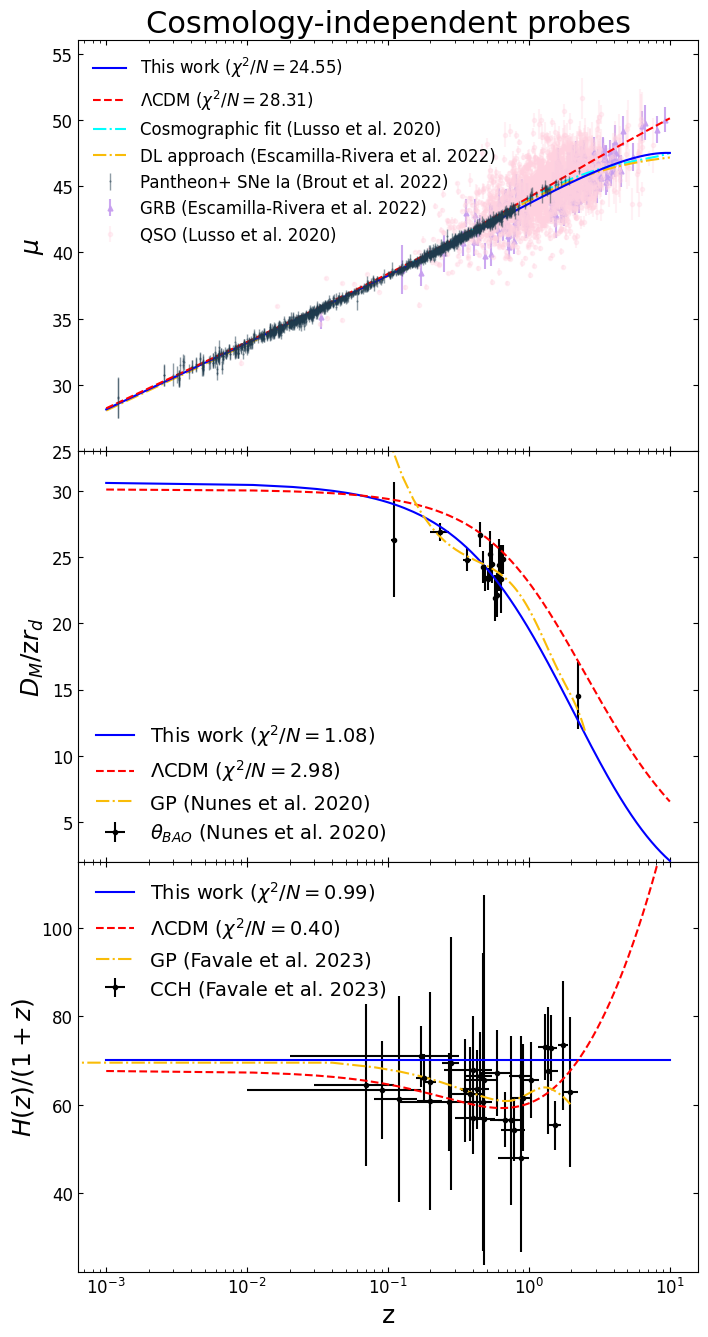

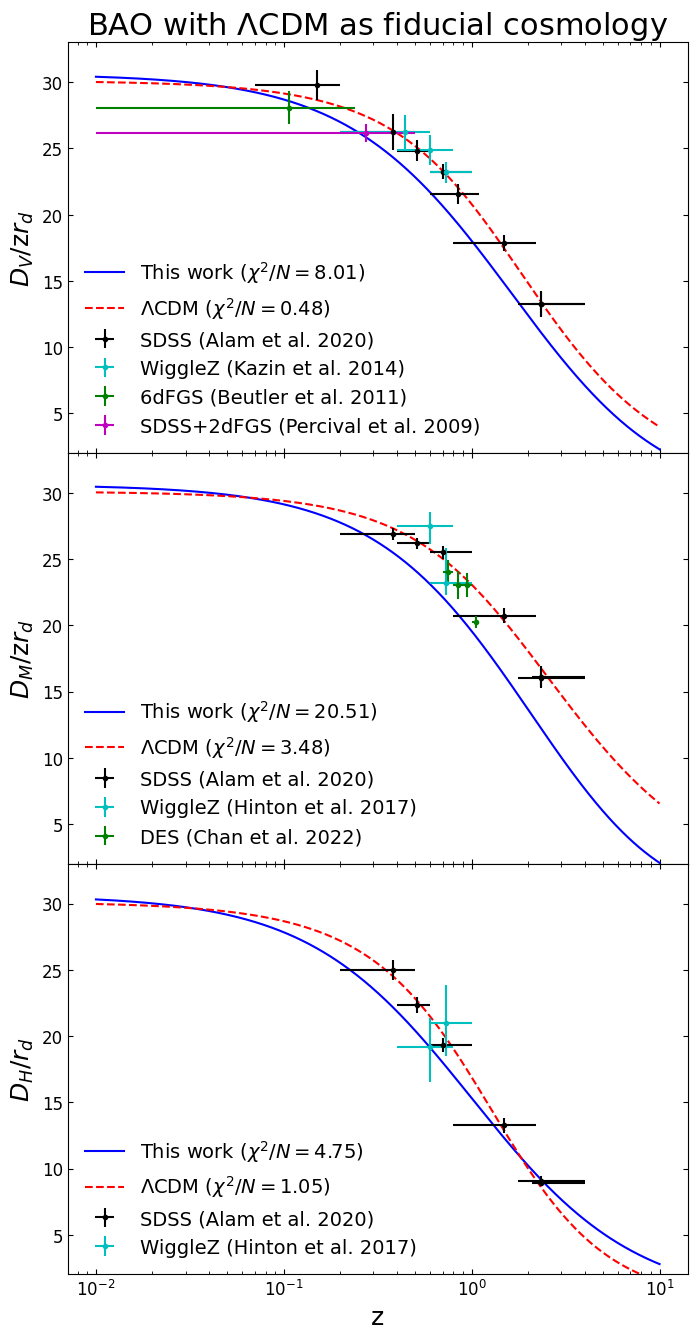

In [ ]:
# plt.rcParams['figure.figsize'] = [8, 16]

fig = plt.figure(figsize=(8,16))
fig.tight_layout()
gs = fig.add_gridspec(nrows=3, hspace=0)
((ax0, ax2, ax4)) = gs.subplots(sharex='col')
# fig.suptitle('Comparison: Finite Universe vs. $\Lambda$CDM ')


#model-independent
ax0.plot(zl,muteorfin,'b',label='This work ($\chi^2/N=24.55$)',zorder=40)
ax0.plot(zl,muP,'r--',label='$\Lambda$CDM ($\chi^2/N=28.31$)',zorder=50)
ax0.plot(zl,mux(fit),linestyle='-.',color='xkcd:cyan',label='Cosmographic fit (Lusso et al. 2020)',zorder=20)
ax0.plot(zl,muDL,linestyle='-.',color='xkcd:golden rod',label='DL approach (Escamilla-Rivera et al. 2022)',zorder=30)
ax0.errorbar(z,mu,yerr=errmu,lw=1,markersize=1,fmt='.',label='Pantheon+ SNe Ia (Brout et al. 2022)',color='xkcd:dark blue grey',alpha=0.5,zorder=60)
ax0.errorbar(zRNN_total,muRNN_total,yerr=errmuRNN_total,markersize=3.5,fmt='^',label='GRB (Escamilla-Rivera et al. 2022)',color='xkcd:lavender',alpha=0.9) #dark blue grey
ax0.errorbar(zQSO,muQSO,yerr=errmuQSO,fmt='.',label='QSO (Lusso et al. 2020)',color='xkcd:light pink',alpha=0.3)
ax0.legend(loc='upper left', frameon=False, fontsize=12)

ax2.errorbar(ztheta,DMtheta/ztheta,yerr=errDMtheta/ztheta,xerr=errztheta,fmt='k.',label='$\\theta_{BAO}$ (Nunes et al. 2020)')
# plt.errorbar(z_stai,DA_stai,errDA_stai,fmt='g.',label='Staicova et al. (2022)')
ax2.plot(zl,dateorica(zl,t0)/rdF/zl*(1+zl),'b',label='This work ($\chi^2/N=1.08$)') #importante: recordar cambiar a Mpc
# plt.plot(z,np.arcsin(135/daF2/(1+z))*180/np.pi,'b',label='Finite Universe ($H_0$~70 km/s/Mpc) ')
ax2.plot(zl,P.comoving_distance(zl)/u.Mpc/rd0/zl,'r--',label='$\Lambda$CDM ($\chi^2/N=2.98$)') #angular_diameter_distance(zl)
ax2.plot(zda_GP,da_GP/zda_GP*(1+zda_GP),color='xkcd:golden rod',linestyle='-.',label='GP (Nunes et al. 2020)')
# plt.plot(z,np.arcsin(148/daP/(1+z))*180/np.pi,'r',label='Planck18')
ax2.legend(loc='lower left', frameon=False, fontsize=14)

ax4.errorbar(zCCH[:,0],zCCH[:,1]/(1+zCCH[:,0]),yerr=zCCH[:,2]/(1+zCCH[:,0]), xerr = errzCCH, fmt='k.',label='CCH (Favale et al. 2023)')
ax4.plot(zl,H0f*np.ones(len(zl)),'b',label='This work ($\chi^2/N=0.99$)')
ax4.plot(zl,P.H(zl)/(1+zl),'r--',label='$\Lambda$CDM ($\chi^2/N=0.40$)')
ax4.plot(zCCH_GP,H_CCH_GP/(1+zCCH_GP),linestyle='-.',color='xkcd:golden rod',label='GP (Favale et al. 2023)')
ax4.legend(loc='upper left', frameon=False,fontsize=14)

ax0.set_title('Cosmology-independent probes', fontsize=22)

for ax in fig.get_axes():
    # ax.grid()
    ax.tick_params(axis ='both',which='both', direction = 'in',top='True',right='True', labelsize=12)

for ax in fig.get_axes():
    ax.set(xscale='log')

ax4.set_xlabel('z',fontsize=18)


ax0.set_ylabel('$\mu$', fontsize=18)
ax2.set_ylabel('$D_M$/z$r_d$',fontsize=18)
ax4.set_ylabel('$H(z)/(1+z)$',fontsize=18)

ax0.set(ylim=(25,56))
ax2.set(ylim=(2,33))
ax4.set(ylim=(22,115))


plt.savefig('observations_left.pdf',bbox_inches='tight')



fig = plt.figure(figsize=(8,16))
fig.tight_layout()
gs = fig.add_gridspec(nrows=3, hspace=0)
((ax1, ax3, ax5)) = gs.subplots(sharex='col')


#BAO (fiducial LCDM)
ax1.plot(zbao,dVF2/(zbao*rdF),'b',label='This work ($\chi^2/N=8.01$)')
ax1.plot(zbao,dVP/(zbao*rd0),'r--',label='$\Lambda$CDM ($\chi^2/N=0.48$)')
ax1.errorbar(zeff,np.array(DVDATA)/np.array(zeff),yerr=errDVDATA/np.array(zeff),xerr=errzeff,fmt='k.',label='SDSS (Alam et al. 2020)') #xlolims=uplims
ax1.errorbar(zwig,DVwig/zwig,yerr=errDVwig/zwig,xerr=xerrDVwig,fmt='c.',label='WiggleZ (Kazin et al. 2014)')
ax1.errorbar(z6df,DV6df/z6df,yerr=errDV6df/z6df,xerr=[[0.096],[0.134]],fmt='g.',label='6dFGS (Beutler et al. 2011)') #Beutleur et al., 6dFGS
ax1.errorbar(z7,DV7/z7,yerr=errDV7/z7,xerr=xerrDV7,fmt='m.',label='SDSS+2dFGS (Percival et al. 2009)')
ax1.legend(loc='lower left', frameon=False, fontsize=14)

ax3.plot(zbao,dmunivfin/zbao,color='b',label='This work ($\chi^2/N=20.51$)')
ax3.plot(zbao,DMP/(zbao*rd0),'r--',label='$\Lambda$CDM ($\chi^2/N=3.48$)')
# axs[1].errorbar(ztheta,DMtheta/ztheta,errDMtheta/ztheta,fmt='b.',label='No fiducial assumed')
ax3.errorbar(zsdss,DM/zsdss,yerr=edm/zsdss,xerr=errzsdss,fmt='k.',label='SDSS (Alam et al. 2020)')
ax3.errorbar(zwigbao,DMwig/zwigbao,yerr=errDMwig/zwigbao,xerr=xerrDMwig,fmt='c.',label='WiggleZ (Hinton et al. 2017)')
ax3.errorbar(zdes,DMdes/zdes,yerr=errDMdes/zdes,xerr=errzdes,fmt='g.',label='DES (Chan et al. 2022)')
# axs[1].errorbar(z12,DM12/z12,yerr=errDM12/z12,fmt='y.',label='SDSS DR12 (Alam et al. 2016)')
ax3.legend(loc='lower left', frameon=False, fontsize=14)

ax5.plot(zbao,dhunivfin,color='b',label='This work ($\chi^2/N=4.75$)')
ax5.plot(zbao,DHP/(rd0),'r--',label='$\Lambda$CDM ($\chi^2/N=1.05$)')
ax5.errorbar(zsdss,DH,yerr=edh,xerr=errzsdss,fmt='.',color='k',label='SDSS (Alam et al. 2020)')
# axs[2].errorbar(z12,DH12,yerr=errDH12,fmt='y.',label='SDSS DR12 (Alam et al. 2016)')
ax5.errorbar(zwigbao,DHwig,yerr=errDHwig,xerr=xerrDMwig,fmt='c.',label='WiggleZ (Hinton et al. 2017)')
ax5.legend(loc='lower left', frameon=False, fontsize=14)

ax1.set_title('BAO with $\Lambda$CDM as fiducial cosmology', fontsize=22)

for ax in fig.get_axes():
    # ax.grid()
    ax.tick_params(axis ='both', which = 'both', direction = 'in', top = 'True', right = 'True', labelsize = 12)

for ax in fig.get_axes():
    ax.set(xscale='log')

ax5.set_xlabel('z',fontsize=18)

ax1.set_ylabel('$D_V$/z$r_d$',fontsize=18)
ax3.set_ylabel('$D_M$/z$r_d$',fontsize=18)
ax5.set_ylabel('$D_H$/$r_d$',fontsize=18)
# ax1.set_yticks(ticks=False, fontsize=12)
# ax3.set_yticks(ticks=False, fontsize=12)
# ax5.set_yticks(ticks=False, fontsize=12)


ax1.set(ylim=(2,33))
ax3.set(ylim=(2,33))
ax5.set(ylim=(2,33))

plt.savefig('observations_right.pdf',bbox_inches='tight')
plt.show()

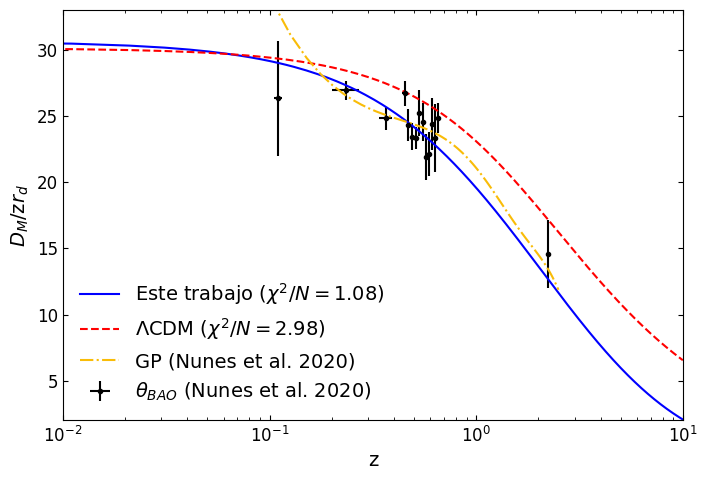

In [ ]:
plt.figure(figsize=(8,16/3))
plt.errorbar(ztheta,DMtheta/ztheta,yerr=errDMtheta/ztheta,xerr=errztheta,fmt='k.',label='$\\theta_{BAO}$ (Nunes et al. 2020)')
# plt.errorbar(z_stai,DA_stai,errDA_stai,fmt='g.',label='Staicova et al. (2022)')
plt.plot(zl,dateorica(zl,t0)/rdF/zl*(1+zl),'b',label='Este trabajo ($\chi^2/N=1.08$)') #importante: recordar cambiar a Mpc
# plt.plot(z,np.arcsin(135/daF2/(1+z))*180/np.pi,'b',label='Finite Universe ($H_0$~70 km/s/Mpc) ')
plt.plot(zl,P.comoving_distance(zl)/u.Mpc/rd0/zl,'r--',label='$\Lambda$CDM ($\chi^2/N=2.98$)') #angular_diameter_distance(zl)
plt.plot(zda_GP,da_GP/zda_GP*(1+zda_GP),color='xkcd:golden rod',linestyle='-.',label='GP (Nunes et al. 2020)')
plt.ylabel('$D_M$/z$r_d$',fontsize=14)
plt.xlabel('z',fontsize=14)
# plt.plot(z,np.arcsin(148/daP/(1+z))*180/np.pi,'r',label='Planck18')
plt.legend(loc='lower left', frameon=False, fontsize=14)
plt.tick_params(axis ='both',which='both', direction = 'in',top='True',right='True', labelsize=12)
plt.ylim(2,33)
plt.xlim(1e-2, 10)
plt.xscale('log')
plt.savefig('thetaBAO.png')

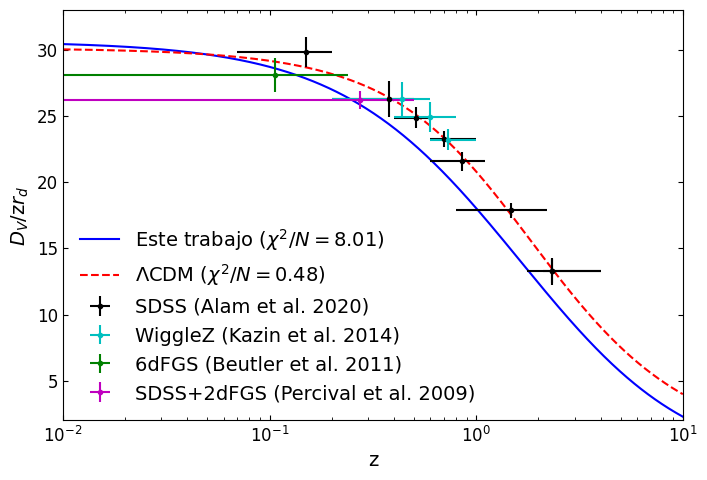

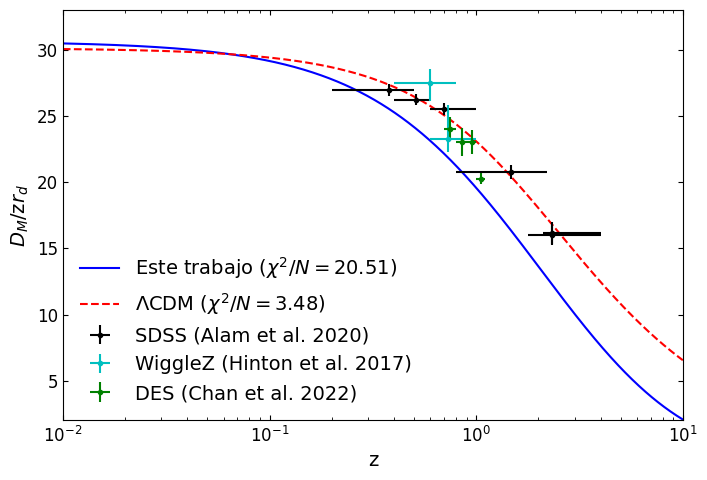

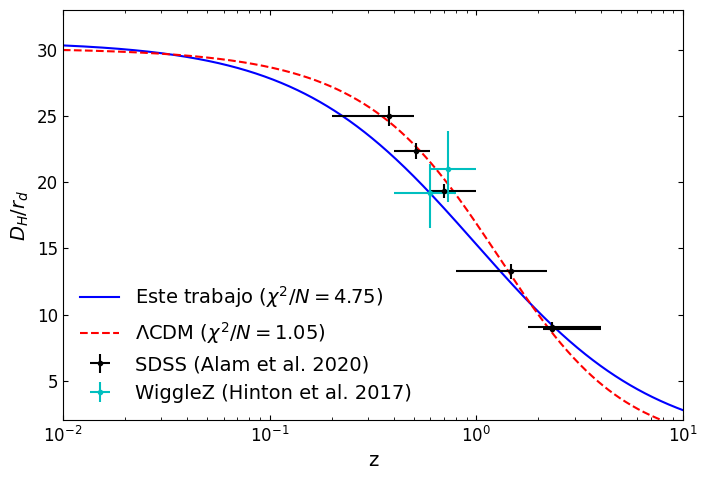

In [ ]:
plt.figure(figsize=(8,16/3))

plt.plot(zbao,dVF2/(zbao*rdF),'b',label='Este trabajo ($\chi^2/N=8.01$)')
plt.plot(zbao,dVP/(zbao*rd0),'r--',label='$\Lambda$CDM ($\chi^2/N=0.48$)')
plt.errorbar(zeff,np.array(DVDATA)/np.array(zeff),yerr=errDVDATA/np.array(zeff),xerr=errzeff,fmt='k.',label='SDSS (Alam et al. 2020)') #xlolims=uplims
plt.errorbar(zwig,DVwig/zwig,yerr=errDVwig/zwig,xerr=xerrDVwig,fmt='c.',label='WiggleZ (Kazin et al. 2014)')
plt.errorbar(z6df,DV6df/z6df,yerr=errDV6df/z6df,xerr=[[0.096],[0.134]],fmt='g.',label='6dFGS (Beutler et al. 2011)') #Beutleur et al., 6dFGS
plt.errorbar(z7,DV7/z7,yerr=errDV7/z7,xerr=xerrDV7,fmt='m.',label='SDSS+2dFGS (Percival et al. 2009)')
plt.ylabel('$D_V$/z$r_d$',fontsize=14)
plt.xlabel('z',fontsize=14)
# plt.plot(z,np.arcsin(148/daP/(1+z))*180/np.pi,'r',label='Planck18')
plt.legend(loc='lower left', frameon=False, fontsize=14)
plt.tick_params(axis ='both',which='both', direction = 'in',top='True',right='True', labelsize=12)
plt.ylim(2,33)
plt.xlim(1e-2, 10)
plt.xscale('log')
plt.savefig('1BAO.png')

#-------------------------------------------------------
plt.figure(figsize=(8,16/3))

plt.plot(zbao,dmunivfin/zbao,color='b',label='Este trabajo ($\chi^2/N=20.51$)')
plt.plot(zbao,DMP/(zbao*rd0),'r--',label='$\Lambda$CDM ($\chi^2/N=3.48$)')
# axs[1].errorbar(ztheta,DMtheta/ztheta,errDMtheta/ztheta,fmt='b.',label='No fiducial assumed')
plt.errorbar(zsdss,DM/zsdss,yerr=edm/zsdss,xerr=errzsdss,fmt='k.',label='SDSS (Alam et al. 2020)')
plt.errorbar(zwigbao,DMwig/zwigbao,yerr=errDMwig/zwigbao,xerr=xerrDMwig,fmt='c.',label='WiggleZ (Hinton et al. 2017)')
plt.errorbar(zdes,DMdes/zdes,yerr=errDMdes/zdes,xerr=errzdes,fmt='g.',label='DES (Chan et al. 2022)')
plt.ylabel('$D_M$/z$r_d$',fontsize=14)


plt.xlabel('z',fontsize=14)
# plt.plot(z,np.arcsin(148/daP/(1+z))*180/np.pi,'r',label='Planck18')
plt.legend(loc='lower left', frameon=False, fontsize=14)
plt.tick_params(axis ='both',which='both', direction = 'in',top='True',right='True', labelsize=12)
plt.ylim(2,33)
plt.xlim(1e-2, 10)
plt.xscale('log')
plt.savefig('2BAO.png')

#-------------------------------------------------------
plt.figure(figsize=(8,16/3))

plt.plot(zbao,dhunivfin,color='b',label='Este trabajo ($\chi^2/N=4.75$)')
plt.plot(zbao,DHP/(rd0),'r--',label='$\Lambda$CDM ($\chi^2/N=1.05$)')
plt.errorbar(zsdss,DH,yerr=edh,xerr=errzsdss,fmt='.',color='k',label='SDSS (Alam et al. 2020)')
# axs[2].errorbar(z12,DH12,yerr=errDH12,fmt='y.',label='SDSS DR12 (Alam et al. 2016)')
plt.errorbar(zwigbao,DHwig,yerr=errDHwig,xerr=xerrDMwig,fmt='c.',label='WiggleZ (Hinton et al. 2017)')
plt.ylabel('$D_H$/$r_d$',fontsize=14)

plt.xlabel('z',fontsize=14)
# plt.plot(z,np.arcsin(148/daP/(1+z))*180/np.pi,'r',label='Planck18')
plt.legend(loc='lower left', frameon=False, fontsize=14)
plt.tick_params(axis ='both',which='both', direction = 'in',top='True',right='True', labelsize=12)
plt.ylim(2,33)
plt.xlim(1e-2, 10)
plt.xscale('log')
plt.savefig('3BAO.png')

In [ ]:
#@title Cálculo $\chi^2$ de $D_V$
xidvfin=[]
dv=lambda z,rdF: t0*Gyrpc*np.power((z*1/(1+z)*np.power(np.sin(np.log(1+z)),2)),1/3)*1e-6/rdF #en Mpc

for i in range(0,len(zeff)):
  xidvfin.append(dv(zeff[i],rdF))

chisq = lambda res, err: np.sum(np.dot((res/err),(res/err)))
res =[]
res.append(np.power(zeff*(P.comoving_distance(zeff)/u.Mpc)**2*((ct.c/P.H(zeff)).to_value(u.Mpc)),1/3)/rd0-DVDATA)
res.append(np.array(xidvfin)-np.array(DVDATA))

chi=[]
for i in range(0,2):
  chi.append(chisq(res[i],errDVDATA))

df = len(DVDATA)
print("chisq(D_V): LCDM =",chi[0],"df =",df)
print("chisq(D_V): finite universe =",chi[1],"df =",df)

print('---------')
print("reduced chisq: LCDM =",chi[0]/(df))
print("reduced chisq: finite universe =",chi[1]/(df))

#--------------------------------------------------------------------------------
#añadimos datos que no sean del SDSS
dv=lambda z,rdF: t0*Gyrpc*np.power((z*1/(1+z)*np.power(np.sin(np.log(1+z)),2)),1/3)*1e-6/rdF #en Mpc

xidvfin2=[]

for i in range(0,len(zwig)):
  xidvfin2.append(dv(zwig[i],rdF))

res =[]
res.append(np.power(zwig*(P.comoving_distance(zwig)/u.Mpc)**2*((ct.c/P.H(zwig)).to_value(u.Mpc)),1/3)/rd0-DVwig)
res.append(np.array(xidvfin2)-np.array(DVwig))

chi2=[]
for i in range(0,2):
  chi2.append(chisq(res[i],errDVwig))

df2 = len(DVwig)
print('------------')
print(' ')
print("chisq(D_V): LCDM =",chi2[0],"df =",df2)
print("chisq(D_V): finite universe =",chi2[1],"df =",df2)
print('------------')
print("reduced chisq: LCDM =",chi2[0]/(df2))
print("reduced chisq: finite universe =",chi2[1]/(df2))


z6df_z7=np.concatenate((z6df,z7))

DV6df_z7=np.zeros(2)
errDV6df_z7=np.zeros(2)
DV6df_z7[0]=DV6df
DV6df_z7[1]=DV7
errDV6df_z7[0]=errDV6df
errDV6df_z7[1]=errDV7

xidvfin3=[]

for i in range(0,len(z6df_z7)):
  xidvfin3.append(dv(z6df_z7[i],rdF))

res =[]
res.append(np.power(z6df_z7*(P.comoving_distance(z6df_z7)/u.Mpc)**2*(((ct.c/P.H(z6df_z7)).to_value(u.Mpc))),1/3)/rd0-DV6df_z7)
res.append(np.array(xidvfin3)-np.array(DV6df_z7))

chi3=[]
for i in range(0,2):
  chi3.append(chisq(res[i],errDV6df_z7))

df3 = len(DV6df_z7)
print('------------')
print(' ')
print("chisq(D_V): LCDM =",chi3[0],"df =",df3)
print("chisq(D_V): finite universe =",chi3[1],"df =",df3)
print('------------')
print("reduced chisq: LCDM =",chi3[0]/(df3))
print("reduced chisq: finite universe =",chi3[1]/(df3))

print('------------')
print(' ')
print("chisqtot(D_V): LCDM =",chi[0]+chi2[0]+chi3[0],"df =",df+df2+df3)
print("chisqtot(D_V): finite universe =",chi[1]+chi2[1]+chi3[1],"df =",df+df2+df3)
print('------------')
print("reduced chisq tot: LCDM =",(chi[0]+chi2[0]+chi3[0])/(df+df2+df3))
print("reduced chisq tot: finite universe =",(chi[1]+chi2[1]+chi3[1])/(df+df2+df3))

chisq(D_V): LCDM = 1.9797636453780865 df = 8
chisq(D_V): finite universe = 78.55016279671284 df = 8
---------
reduced chisq: LCDM = 0.2474704556722608
reduced chisq: finite universe = 9.818770349589105
------------
 
chisq(D_V): LCDM = 0.5341422259965785 df = 3
chisq(D_V): finite universe = 25.202658192190988 df = 3
------------
reduced chisq: LCDM = 0.17804740866552615
reduced chisq: finite universe = 8.400886064063663
------------
 
chisq(D_V): LCDM = 3.762408048734035 df = 2
chisq(D_V): finite universe = 0.4267791088890482 df = 2
------------
reduced chisq: LCDM = 1.8812040243670174
reduced chisq: finite universe = 0.2133895544445241
------------
 
chisqtot(D_V): LCDM = 6.2763139201087 df = 13
chisqtot(D_V): finite universe = 104.17960009779289 df = 13
------------
reduced chisq tot: LCDM = 0.4827933784699
reduced chisq tot: finite universe = 8.013815392137914


In [ ]:
#@title Cálculo $\chi^2$ de $D_M$
xidmfin=[]
dmfit=lambda z,rd : t0*Gyrpc*np.sin(np.log(1+z))/rd*1e-6

# chisq = lambda res, err: np.sum((res/err)**2)
chisq = lambda res, err: np.sum(np.dot((res/err),(res/err)))

for i in range(0,len(zsdss)):
  xidmfin.append(dmfit(zsdss[i],rdF))

res =[]
res.append(P.comoving_distance(zsdss)/u.Mpc/rd0-DM)
res.append(np.array(xidmfin)-DM)

chi=[]
for i in range(0,2):
  chi.append(chisq(res[i],edm))

df = len(DM)
print("chisq(D_M): LCDM =",chi[0],"df =",df)
print("chisq(D_M): finite universe =",chi[1],"df =",df)

print('---------')
print("reduced chisq: LCDM =",chi[0]/(df))
print("reduced chisq: finite universe =",chi[1]/(df))

xidmfin=[]
for i in range(0,len(zwigbao)):
  xidmfin.append(dmfit(zwigbao[i],rdF))


res =[]
res.append(P.comoving_distance(zwigbao)/u.Mpc/rd0-DMwig)
res.append(np.array(xidmfin)-DMwig)

chi2=[]
for i in range(0,2):
  chi2.append(chisq(res[i],errDMwig))

df2 = len(DMwig)

errinf=errDMwig[0]
errsup=errDMwig[1]
print('---------')
print(res) #con los residuos podemos saber si dividir por el error inferior o superior
chi2[0]=(res[0][0]/errinf[0])**2+(res[0][1]/errsup[1])**2
chi2[1]=(res[1][0]/errinf[0])**2+(res[1][1]/errinf[1])**2
print('---------')
print("chisq(D_M): LCDM =",chi2[0],"df =",df2)
print("chisq(D_M): finite universe =",chi2[1],"df =",df2)

print('---------')
print("reduced chisq: LCDM =",chi2[0]/(df2))
print("reduced chisq: finite universe =",chi2[1]/(df2))

#----------------------------------
xidmfin=[]

for i in range(0,len(zdes)):
  xidmfin.append(dmfit(zdes[i],rdF))

res =[]
res.append(P.comoving_distance(zdes)/u.Mpc/rd0-DMdes)
res.append(np.array(xidmfin)-DMdes)

chi3=[]
for i in range(0,2):
  chi3.append(chisq(res[i],errDMdes))

df3 = len(DMdes)
print("chisq(D_M): LCDM =",chi3[0],"df =",df3)
print("chisq(D_M): finite universe =",chi3[1],"df =",df3)

print('---------')
print("reduced chisq: LCDM =",chi3[0]/(df3))
print("reduced chisq: finite universe =",chi3[1]/(df3))

print('------------')
print(' ')
print("chisqtot(D_V): LCDM =",chi[0]+chi2[0]+chi3[0],"df =",df+df2+df3)
print("chisqtot(D_V): finite universe =",chi[1]+chi2[1]+chi3[1],"df =",df+df2+df3)
print('------------')
print("reduced chisq tot: LCDM =",(chi[0]+chi2[0]+chi3[0])/(df+df2+df3))
print("reduced chisq tot: finite universe =",(chi[1]+chi2[1]+chi3[1])/(df+df2+df3))

chisq(D_M): LCDM = 4.331044974775075 df = 6
chisq(D_M): finite universe = 204.72049709827968 df = 6
---------
reduced chisq: LCDM = 0.7218408291291792
reduced chisq: finite universe = 34.12008284971328
---------
[<Quantity [-1.03812517,  1.17352003]>, array([-2.61435265, -1.00048989])]
---------
chisq(D_M): LCDM = 2.0641922418826595 df = 2
chisq(D_M): finite universe = 12.769759286060191 df = 2
---------
reduced chisq: LCDM = 1.0320961209413297
reduced chisq: finite universe = 6.384879643030096
chisq(D_M): LCDM = 35.32158772212659 df = 4
chisq(D_M): finite universe = 28.58891672452883 df = 4
---------
reduced chisq: LCDM = 8.830396930531647
reduced chisq: finite universe = 7.147229181132207
------------
 
chisqtot(D_V): LCDM = 41.71682493878432 df = 12
chisqtot(D_V): finite universe = 246.0791731088687 df = 12
------------
reduced chisq tot: LCDM = 3.476402078232027
reduced chisq tot: finite universe = 20.506597759072392


In [ ]:
#@title Cálculo $\chi^2$ de $D_H$
xidhfin=[]

for i in range(0,len(zsdss)):
  xidhfin.append(dhfit(zsdss[i],rdF))

res =[]
DHP_sdss=np.array((ct.c/P.H(zsdss)).to_value(u.Mpc)*1/u.Mpc)
res.append(DHP_sdss/rd0-DH)
res.append(np.array(xidhfin)-DH)

chi=[]
for i in range(0,2):
  chi.append(chisq(res[i],edh))

df = len(DH)
print("chisq(D_H): LCDM =",chi[0],"df =",df)
print("chisq(D_H): finite universe =",chi[1],"df =",df)

print('---------')
print("reduced chisq: LCDM =",chi[0]/(df))
print("reduced chisq: finite universe =",chi[1]/(df))

xidhfin=[]
for i in range(0,len(zwigbao)):
  xidhfin.append(dhfit(zwigbao[i],rdF))


res =[]
DHP_wig=np.array(((ct.c/P.H(zwigbao)).to_value(u.Mpc))*1/u.Mpc)
res.append(DHP_wig/rd0-DHwig)
res.append(np.array(xidhfin)-DHwig)

df2 = len(DMwig)

errinf=errDHwig[0]
errsup=errDHwig[1]
print('---------')
print(res) #con los residuos podemos saber si dividir por el error inferior o superior
chi2=list(np.zeros(2))
chi2[0]=(res[0][0]/errsup[0])**2+(res[0][1]/errinf[1])**2
chi2[1]=(res[1][0]/errinf[0])**2+(res[1][1]/errinf[1])**2
print('---------')
print("chisq(D_H): LCDM =",chi2[0],"df =",df2)
print("chisq(D_H): finite universe =",chi2[1],"df =",df2)

print('---------')
print("reduced chisq: LCDM =",chi2[0]/(df2))
print("reduced chisq: finite universe =",chi2[1]/(df2))

print('------------')
print(' ')
print("chisqtot(D_V): LCDM =",chi[0]+chi2[0],"df =",df+df2)
print("chisqtot(D_V): finite universe =",chi[1]+chi2[1],"df =",df+df2)
print('------------')
print("reduced chisq tot: LCDM =",(chi[0]+chi2[0])/(df+df2))
print("reduced chisq tot: finite universe =",(chi[1]+chi2[1])/(df+df2))

chisq(D_H): LCDM = 7.038597393741977 df = 6
chisq(D_H): finite universe = 36.21002124300977 df = 6
---------
reduced chisq: LCDM = 1.173099565623663
reduced chisq: finite universe = 6.035003540501628
---------
[array([ 2.32056859, -1.10641193]), array([-0.03169182, -3.26181755])]
---------
chisq(D_H): LCDM = 1.3484508287084727 df = 2
chisq(D_H): finite universe = 1.7500686720082927 df = 2
---------
reduced chisq: LCDM = 0.6742254143542363
reduced chisq: finite universe = 0.8750343360041464
------------
 
chisqtot(D_V): LCDM = 8.38704822245045 df = 8
chisqtot(D_V): finite universe = 37.96008991501806 df = 8
------------
reduced chisq tot: LCDM = 1.0483810278063062
reduced chisq tot: finite universe = 4.745011239377257


In [ ]:
#@title Módulo de distancias
import warnings
warnings.filterwarnings("ignore")

modP=P.distmod(zbao)
modL=L.distmod(zbao)
modF1=5*np.log10(dlF1*1e6/10) #d in parsecs, luminosity distance dl/10
modF2=5*np.log10(dlF2*1e6/10)

# plt.figure(figsize=(12,8))
# plt.plot(zbao,modF1,'g',label='Finite Universe ($H_0$~65 km/s/Mpc) ') #importante: recordar cambiar a Mpc
# plt.plot(zbao,modF2,'c',label='Finite Universe ($H_0$~70 km/s/Mpc) ')
# plt.plot(zbao,modL,'r',label='$\Lambda$CDM ($H_0$=74 km/s/Mpc)')
# plt.plot(zbao,modP,'b',label='Planck18')
# plt.legend(loc='lower right', frameon=False)
# plt.xlabel('z', fontsize=12)
# plt.ylabel('distance modulus', fontsize=12)
# plt.title('distance modulus comparison')
# plt.xticks(size=12)
# plt.yticks(size=12)
# plt.legend(fontsize='small')
# plt.grid()
# # plt.xlim(0,5)
# # plt.ylim(500,1500)
# plt.xscale('log')

# plt.show()

#Importante señalar que podemos empezar a ver diferencias significativas a z>=3,
#siendo seguramente insalvables para z>=10

In [ ]:
#@title Cálculo del $\chi^2$ de las SNe Ia con la matriz de covarianza

ximufin=[]

for i in range(0,len(zsdss)):
  ximufin.append(dhfit(zsdss[i],rdF))

res = []
DHP_sdss=np.array((ct.c/P.H(zsdss)).to_value(u.Mpc)*1/u.Mpc)
res.append(DHP_sdss/rd0-DH)
res.append(np.array(xidhfin)-DH)

chi=[]
for i in range(0,2):
  chi.append(chisq(res[i],edh))

df = len(DH)
print("chisq(D_H): LCDM =",chi[0],"df =",df)
print("chisq(D_H): finite universe =",chi[1],"df =",df)

print('---------')
print("reduced chisq: LCDM =",chi[0]/(df))
print("reduced chisq: finite universe =",chi[1]/(df))


ValueError: ignored

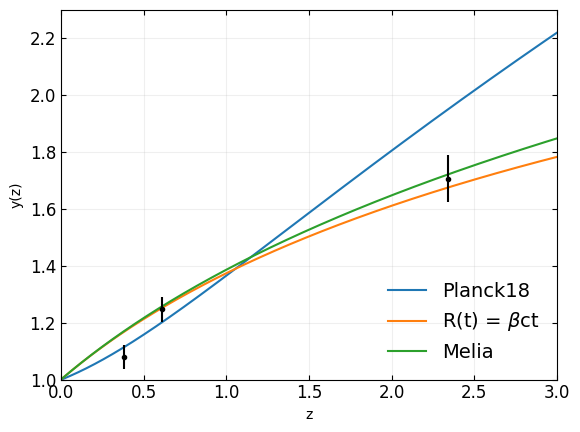

In [ ]:
y_beta = lambda z, beta: beta/z * np.sin(np.log(1+z)/beta) * (1+z)
y_Melia = lambda z: np.log(1+z) * (1+z)/z
y_Planck = lambda z: Planck18.comoving_distance(z) * Planck18.H(z)/3e5/(z)/u.km*u.s

beta = 3
y_beta_AP = y_beta(zbao, beta)
y_Melia_AP = y_Melia(zbao)
y_Planck_AP = y_Planck(zbao)

z_AP = np.array([0.38, 0.61, 2.34])
y_AP = np.array([1.079, 1.248, 1.706])
erry_AP = np.array([0.042, 0.044, 0.083])

# plt.plot(zbao, AP_beta(zbao, np.pi))
plt.plot(zbao, y_Planck_AP, label='Planck18')
plt.plot(zbao, y_beta_AP, label='R(t) = $\\beta$ct')
plt.plot(zbao, y_Melia_AP, label='Melia')
plt.errorbar(z_AP, y_AP, yerr=erry_AP, fmt='k.')
plt.xlim(0, 3)
plt.ylim(1, 2.3)
plt.grid(alpha=0.2)
plt.ylabel('y(z)')
plt.xlabel('z')
plt.tick_params(axis ='both', which='both', direction = 'in', top='True', right='True', labelsize=12)
plt.legend(loc='lower right', frameon=False, fontsize=14)
plt.show()

In [ ]:
xi_P = y_Planck(z_AP)
xi_beta = y_beta(z_AP, beta)
xi_Melia = y_Melia(z_AP)
print(xi_P)

res = []
res.append(xi_P - y_AP)
res.append(xi_beta - y_AP)
res.append(xi_Melia - y_AP)
print(res)
chi=[]
for i in range(0,2):
  chi.append(chisq(res[i], erry_AP))

print(chi)

[1.11342219 1.20092644 1.95003949]
[<Quantity [ 0.03442219, -0.04707356,  0.24403949]>, array([ 0.08940812,  0.00597853, -0.01061652]), array([0.09067165, 0.00894595, 0.01534295])]
[<Quantity 10.46127214>, 4.566462053910184]
